Libraries:

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

Loading data:


In [2]:
%pwd

'C:\\Users\\Goutham-ROG\\Documents\\DS studies\\College\\1st sem\\Intro to ML (IML -3.0)\\EDA + DV\\py'

In [4]:
att = pd.read_csv(r"C:\\Users\\Goutham-ROG\\Documents\\DS studies\\College\\1st sem\\Intro to ML (IML -3.0)\\EDA + DV\\attrition.csv")

In [5]:
att.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [6]:
att.describe(include='all')

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,3,3,6,NaN,2,NaN,NaN,NaN,3,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,Research & Development,Life Sciences,NaN,Male,NaN,NaN,NaN,Married,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1043,961,606,NaN,882,NaN,NaN,NaN,673,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,0.161224,NaN,NaN,NaN,2.721769,NaN,2.729932,2.063946,2.728571,NaN,6502.931293,NaN,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,NaN,NaN,NaN,1.093082,NaN,0.711561,1.106940,1.102846,NaN,4707.956783,NaN,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1009.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,NaN,NaN,NaN,2.000000,NaN,2.000000,1.000000,2.000000,NaN,2911.000000,NaN,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,NaN,NaN,NaN,3.000000,NaN,3.000000,2.000000,3.000000,NaN,4919.000000,NaN,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,NaN,NaN,NaN,4.000000,NaN,3.000000,3.000000,4.000000,NaN,8379.000000,NaN,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000


In [7]:
att.shape

(1470, 20)

In [8]:
#creating a copy of the data
df = att.copy()

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome'],
      dtype='object')

In [47]:
#splitting categorical data
df_cat = df[['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'OverTime',
        'WorkLifeBalance']]
df_cat.tail().shape

(5, 12)

In [46]:
#splitiing numerical data
df_num = df[['Age','Attrition','MonthlyIncome','TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome' ]]
df_num.head()

(5, 9)

Graphs for Attrition:
Total_no. of categories:2


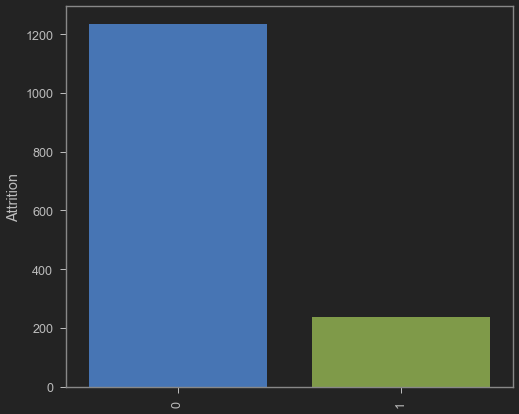

Graphs for BusinessTravel:
Total_no. of categories:3


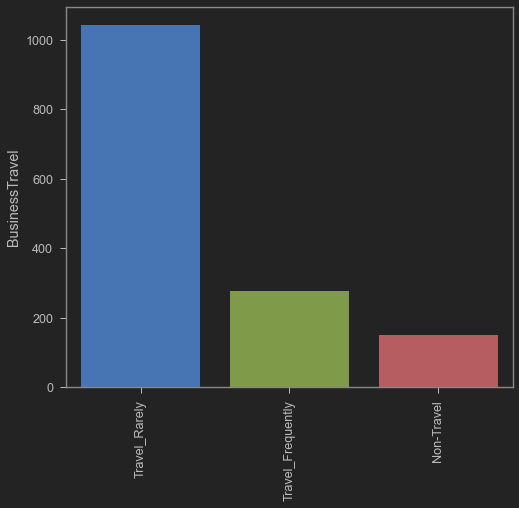

Graphs for Department:
Total_no. of categories:3


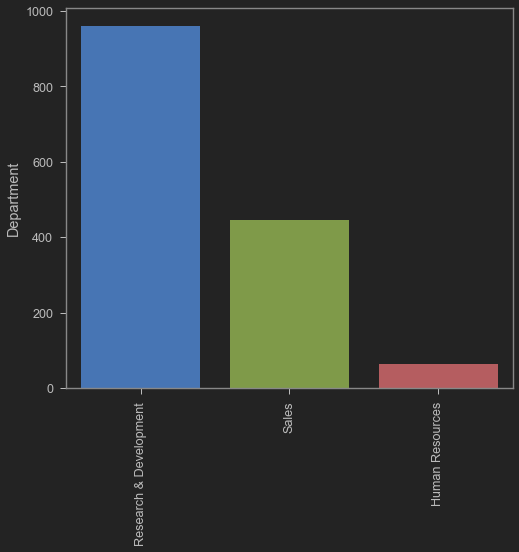

Graphs for EducationField:
Total_no. of categories:6


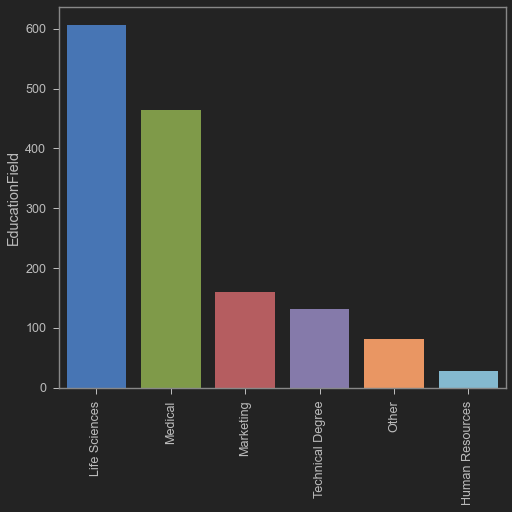

Graphs for EnvironmentSatisfaction:
Total_no. of categories:4


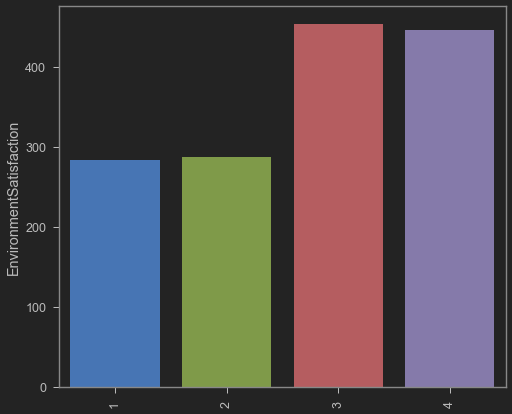

Graphs for Gender:
Total_no. of categories:2


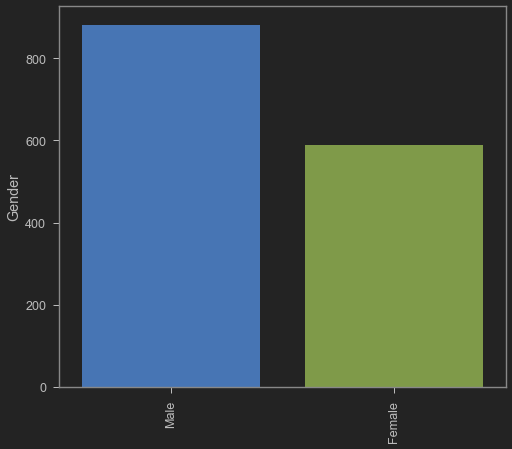

Graphs for JobInvolvement:
Total_no. of categories:4


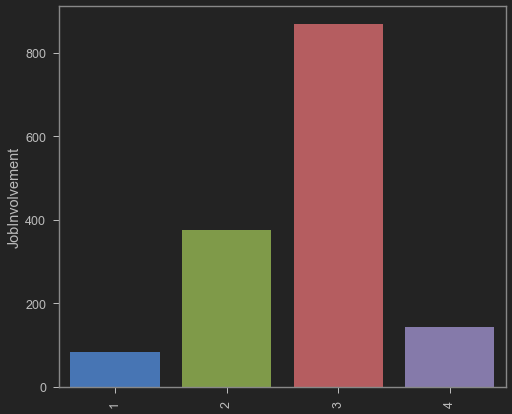

Graphs for JobLevel:
Total_no. of categories:5


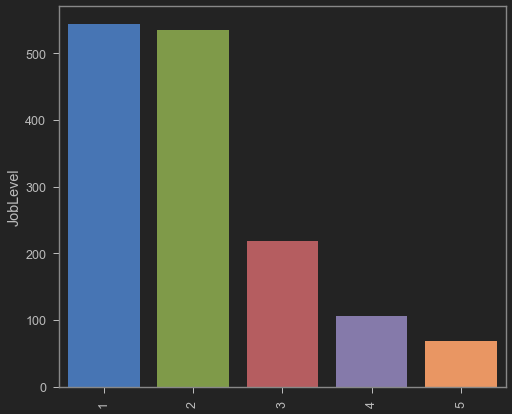

Graphs for JobSatisfaction:
Total_no. of categories:4


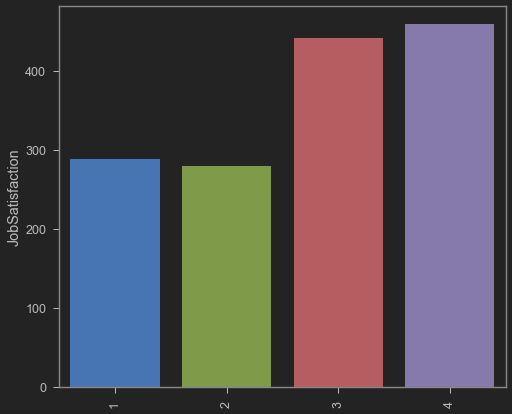

Graphs for MaritalStatus:
Total_no. of categories:3


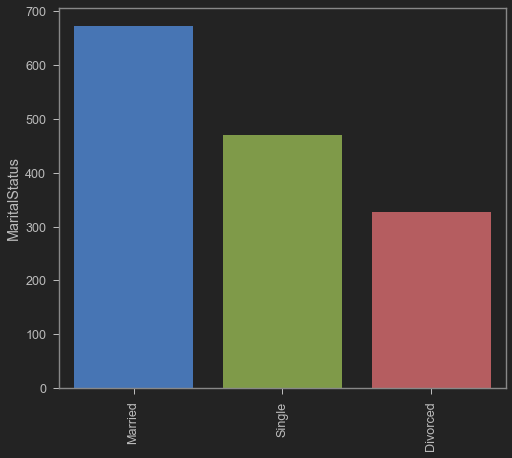

Graphs for OverTime:
Total_no. of categories:2


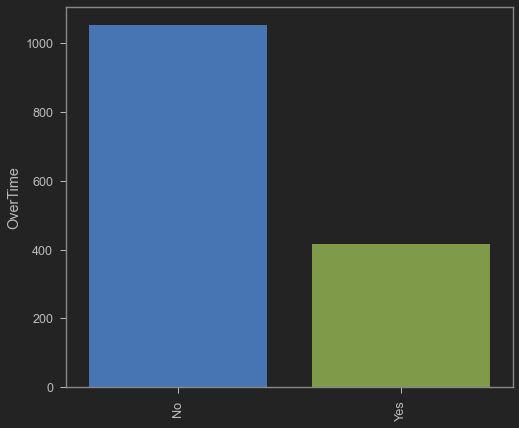

Graphs for WorkLifeBalance:
Total_no. of categories:4


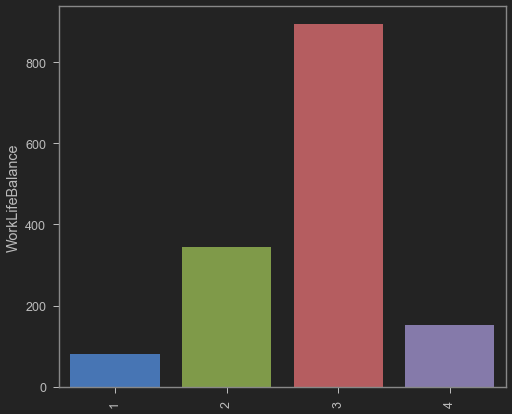

In [26]:
#Categorical variables - count

for i in df_cat:
    cat_num = df_cat[i].value_counts()
    print("Graphs for %s:\nTotal_no. of categories:%d" %(i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y= cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

In [44]:
#correlation matrix - numerical data
correlation_matrix = df_num.corr()
correlation_matrix.to_csv("Correlation_mat-Attrition.csv")
correlation_matrix


,Age,Attrition,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
Age,1.000000,-0.159205,0.497855,0.680381,0.311309,0.212901,0.216513,0.202089,-0.001686
Attrition,-0.159205,1.000000,-0.159840,-0.171063,-0.134392,-0.160545,-0.033019,-0.156199,0.077924
MonthlyIncome,0.497855,-0.159840,1.000000,0.772893,0.514285,0.363818,0.344978,0.344079,-0.017014
TotalWorkingYears,0.680381,-0.171063,0.772893,1.000000,0.628133,0.460365,0.404858,0.459188,0.004628
YearsAtCompany,0.311309,-0.134392,0.514285,0.628133,1.000000,0.758754,0.618409,0.769212,0.009508
YearsInCurrentRole,0.212901,-0.160545,0.363818,0.460365,0.758754,1.000000,0.548056,0.714365,0.018845
YearsSinceLastPromotion,0.216513,-0.033019,0.344978,0.404858,0.618409,0.548056,1.000000,0.510224,0.010029
YearsWithCurrManager,0.202089,-0.156199,0.344079,0.459188,0.769212,0.714365,0.510224,1.000000,0.014406
DistanceFromHome,-0.001686,0.077924,-0.017014,0.004628,0.009508,0.018845,0.010029,0.014406,1.000000


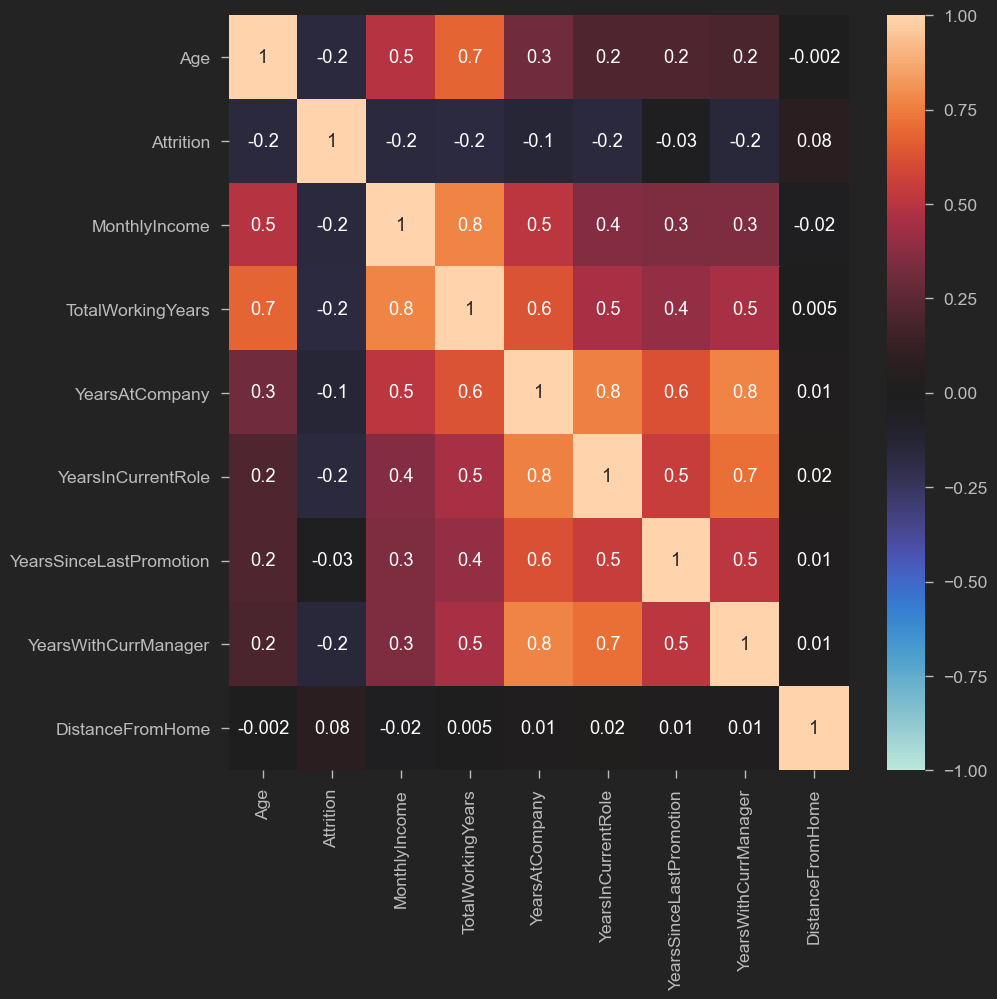

In [45]:
#correlation plot - numerical data
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(df_num.corr(), annot= True ,fmt='0.1g', vmin= -1 , vmax= 1, center=0)
plt.savefig("Correlation -Attrition")